In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Reading leaderboard data from 2024-04-26 version, filtering only ast simple evaluation category.

In [11]:
columns = ['Model', 'Simple Function AST', 'Python Simple Function AST', 'Java Simple Function AST', 'JavaScript Simple Function AST']
df = pd.read_csv("https://raw.githubusercontent.com/ShishirPatil/gorilla/46e959b73be6a40c233e36c71c268ce3a9eabe36/data.csv")
df = df[columns].sort_values(by='Simple Function AST', ascending=False)
df

,Model,Simple Function AST,Python Simple Function AST,Java Simple Function AST,JavaScript Simple Function AST
0,GPT-4-0125-Preview (Prompt),88.00%,94.25%,67.00%,80.00%
4,Gorilla-OpenFunctions-v2 (FC),87.64%,94.25%,67.00%,76.00%
1,Claude-3-Opus-20240229 (Prompt),86.36%,93.25%,66.00%,72.00%
2,GPT-4-turbo-2024-04-09 (Prompt),85.82%,93.00%,60.00%,80.00%
17,Claude-3-Haiku-20240307 (Prompt),85.45%,94.25%,55.00%,76.00%
29,Claude-3-Haiku-20240307 (FC tools-2024-04-04),85.27%,94.25%,60.00%,64.00%
22,Mistral-large-2402 (FC Any),82.91%,91.50%,62.00%,56.00%
3,GPT-4-1106-Preview (FC),82.00%,90.25%,61.00%,58.00%
8,Claude-3-Sonnet-20240229 (Prompt),81.82%,90.25%,53.00%,72.00%
12,Command-R-Plus (Prompt) (Optimized),81.82%,88.25%,64.00%,66.00%


Loading our benchmark results.

In [12]:
df_outlines = pd.read_csv('../data.csv')
df_outlines = df_outlines[columns].sort_values(by='Simple Function AST', ascending=False)
df_outlines = df_outlines[df_outlines['Model'].str.contains("Outlines")]
df_outlines

,Model,Simple Function AST,Python Simple Function AST,Java Simple Function AST,JavaScript Simple Function AST
0,Gorilla-OpenFunctions-v2 (Outlines),77.27%,87.00%,47.00%,60.00%
1,Deepseek-v1.5 (Outlines),75.45%,87.00%,44.00%,46.00%
2,Gemma-7b-it (Outlines),74.18%,84.25%,44.00%,54.00%
3,Mistral-7B-Instruct-v0.2 (Outlines),72.91%,85.50%,37.00%,44.00%
4,Meta-Llama-3-8B-Instruct (Outlines),72.55%,84.25%,40.00%,44.00%


In [13]:
def insert_row(model: str, scores: list) -> pd.DataFrame:
    return (pd.concat([df, pd.DataFrame({'Model': [model],
                                         'Simple Function AST': [scores[0]],
                                         'Python Simple Function AST': [scores[1]],
                                         'Java Simple Function AST': [scores[2]],
                                         'JavaScript Simple Function AST': [scores[3]]})])
                    .sort_values('Simple Function AST', ascending=False)
                    .reset_index(drop=True)
                    .copy())

In [14]:
def plot_bar_ranking(df, metric='Simple Function AST', keyword="Outlines"):
    df[metric] = df[metric].str.replace('%', '').astype(float)
    # Extract the model containing the keyword and find its prefix
    model_with_keyword = df[df["Model"].str.contains(keyword)]["Model"].iloc[0]
    prefix = model_with_keyword.split('-')[0]
    
    # Sorting the dataframe by performance in descending order
    df_sorted = df.sort_values(by=metric, ascending=True)

    # Create the bar plot
    fig, ax = plt.subplots(figsize=(12, 8))
    bars = ax.barh(df_sorted["Model"], df_sorted[metric], color='grey')
    ax.set_xlabel("Accuracy [%]")
    ax.set_title(f"Model Performance on {metric}")

    # Highlight models starting with the same prefix as the model with the keyword
    highlight_color = "#DA4167"
    highlight_color_light = "#EB99AD"
    for bar, model in zip(bars, df_sorted["Model"]):
        if model.startswith(prefix):
            bar.set_color(highlight_color_light)
        if keyword in model:
            bar.set_color(highlight_color)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    plt.show()

    # metric string withouth spaces and in lower case
    metric_str = metric.replace(' ', '_').lower()
    #save fig
    fig.savefig(f'../figures/{prefix}_{metric_str}_bar_plot.png', bbox_inches='tight', dpi=300)

In [17]:
df_outlines

,Model,Simple Function AST,Python Simple Function AST,Java Simple Function AST,JavaScript Simple Function AST
0,Gorilla-OpenFunctions-v2 (Outlines),77.27%,87.00%,47.00%,60.00%
1,Deepseek-v1.5 (Outlines),75.45%,87.00%,44.00%,46.00%
2,Gemma-7b-it (Outlines),74.18%,84.25%,44.00%,54.00%
3,Mistral-7B-Instruct-v0.2 (Outlines),72.91%,85.50%,37.00%,44.00%
4,Meta-Llama-3-8B-Instruct (Outlines),72.55%,84.25%,40.00%,44.00%


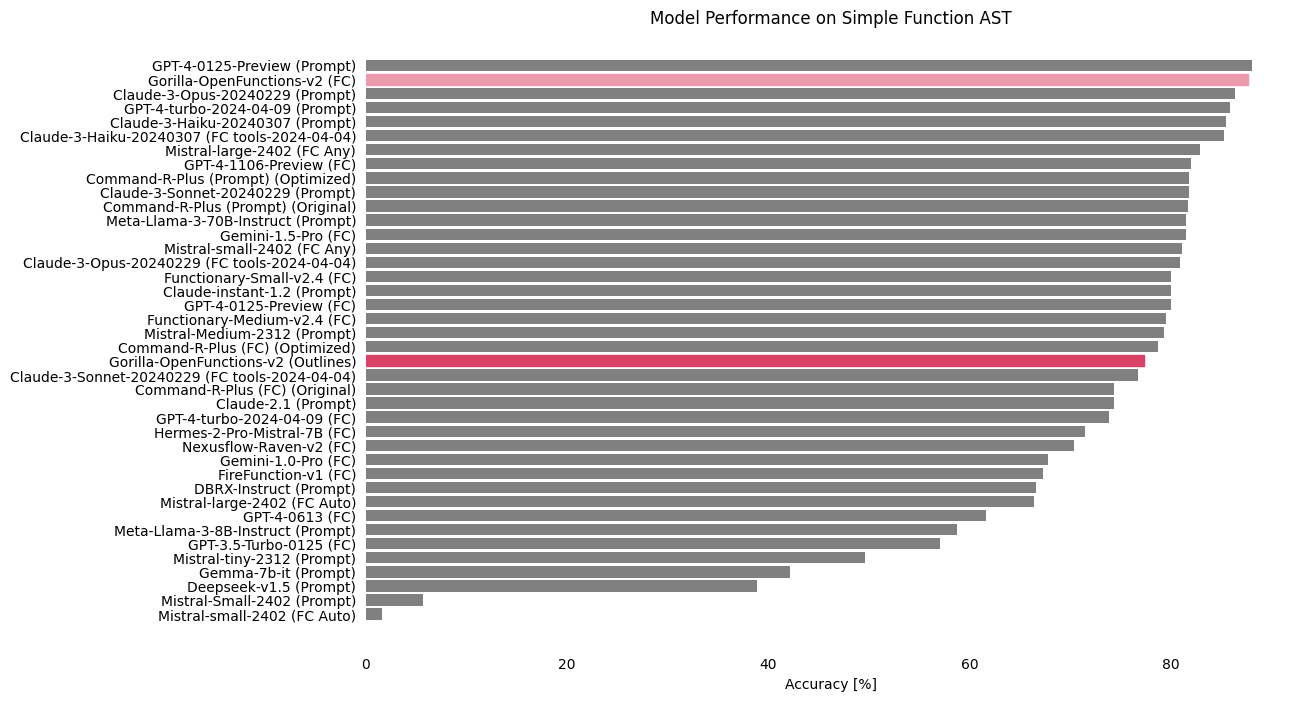

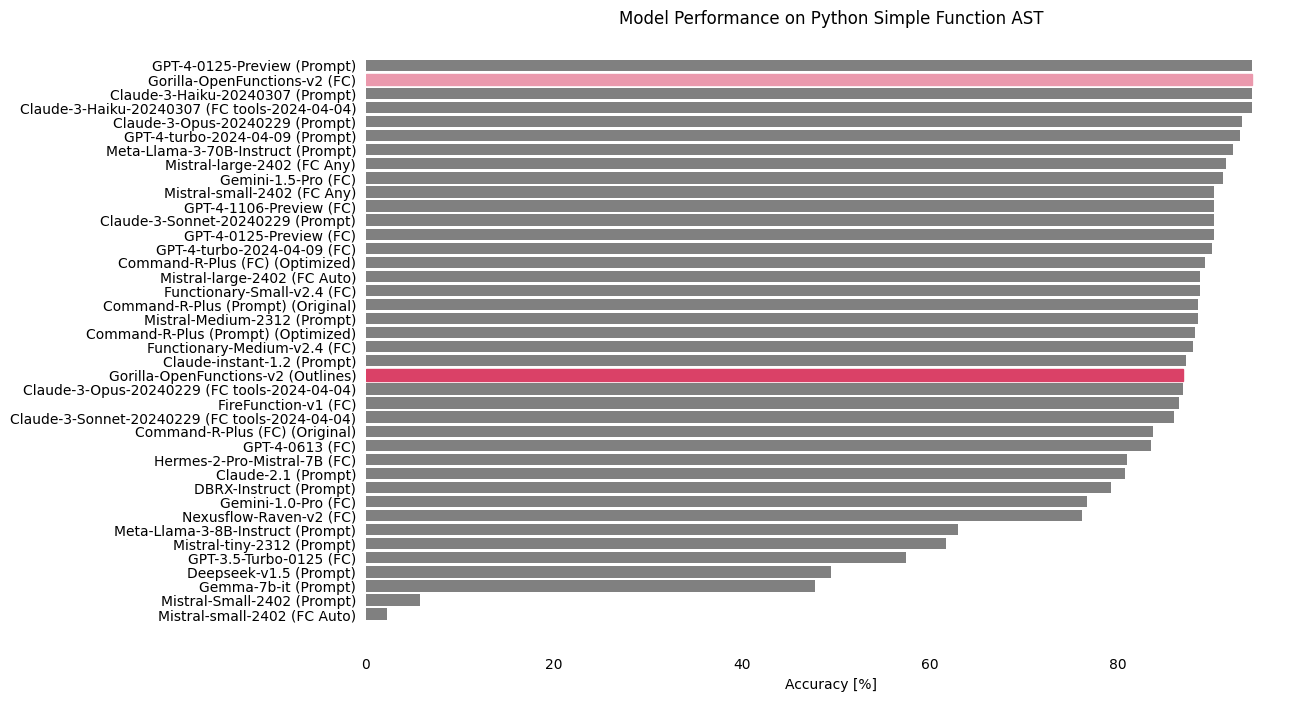

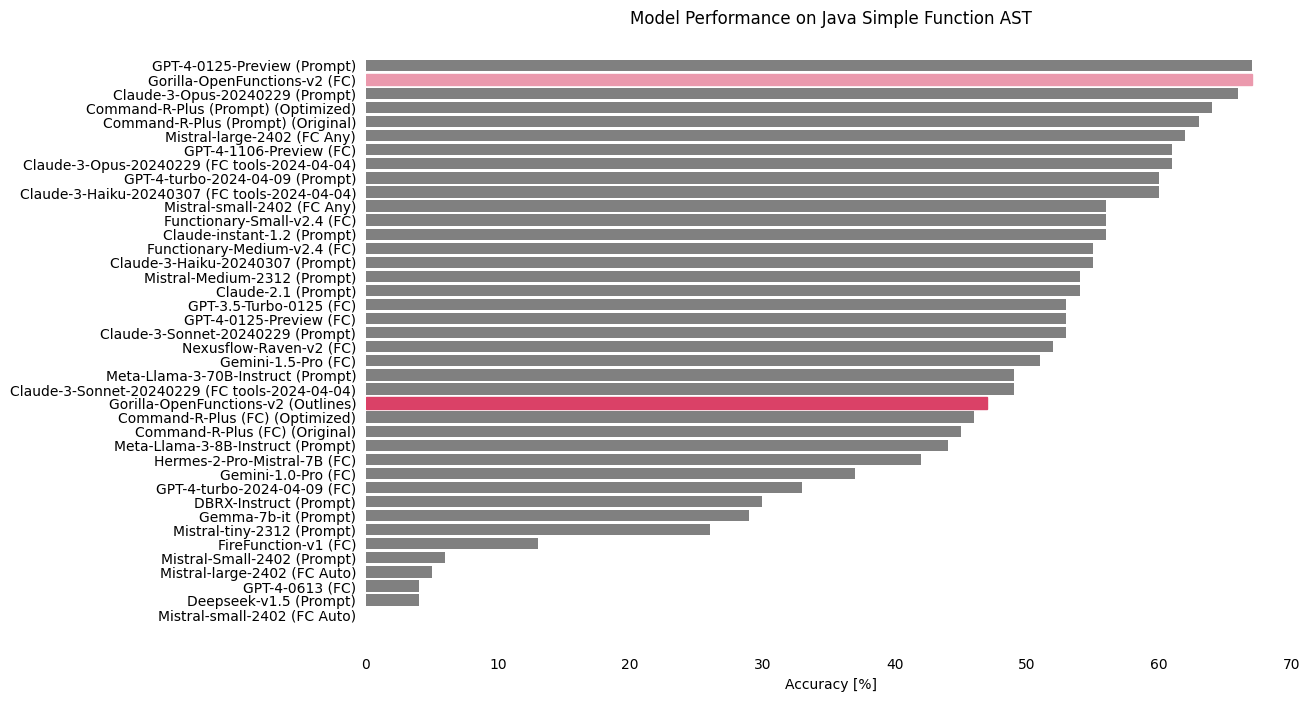

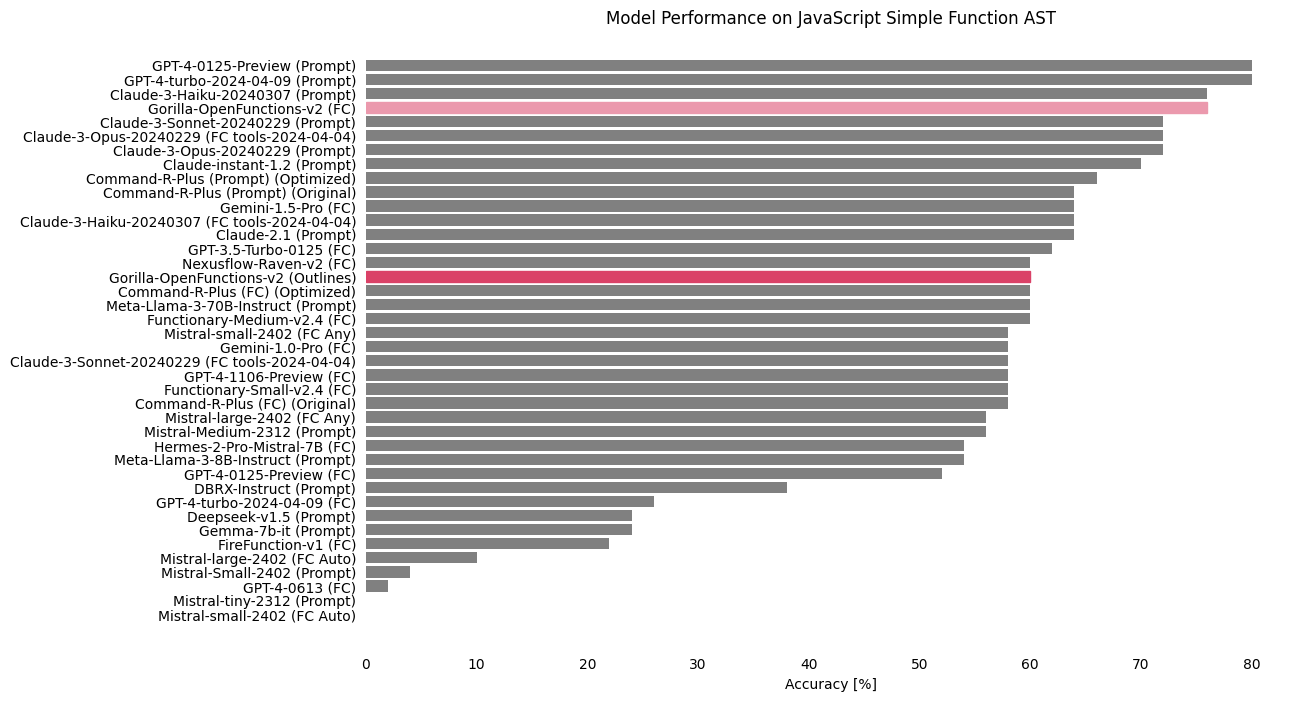

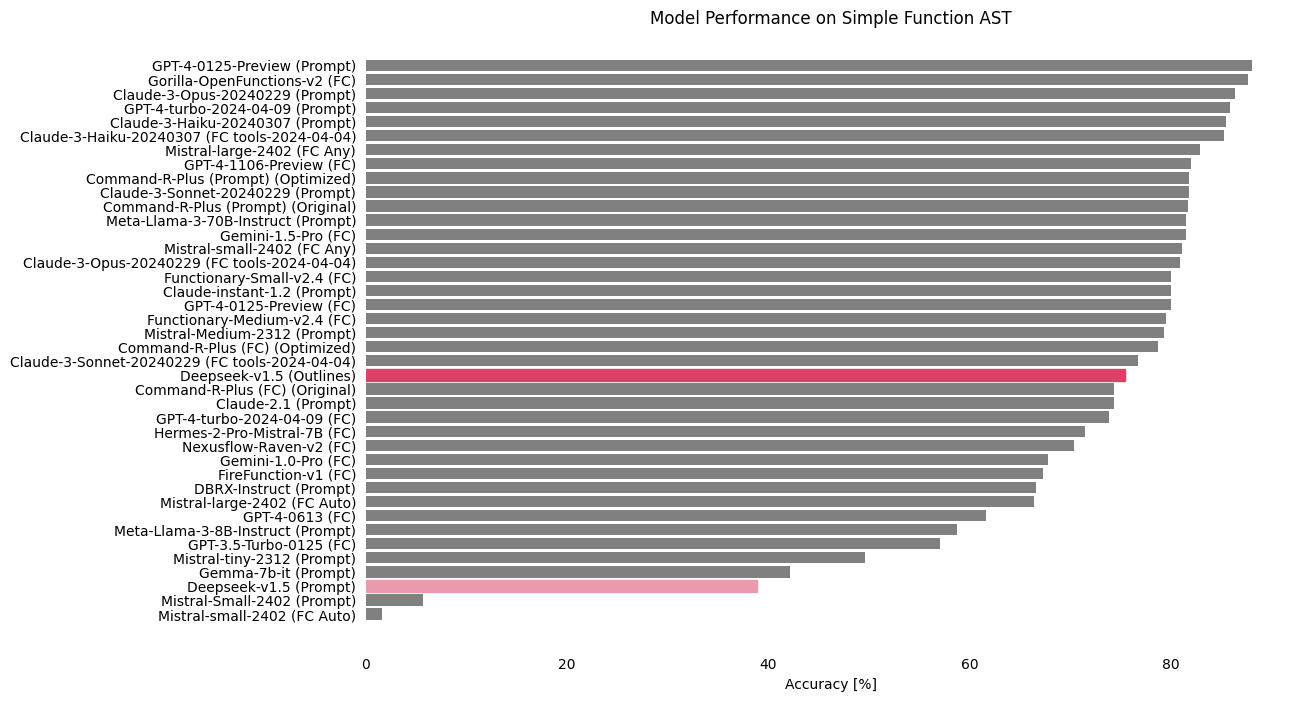

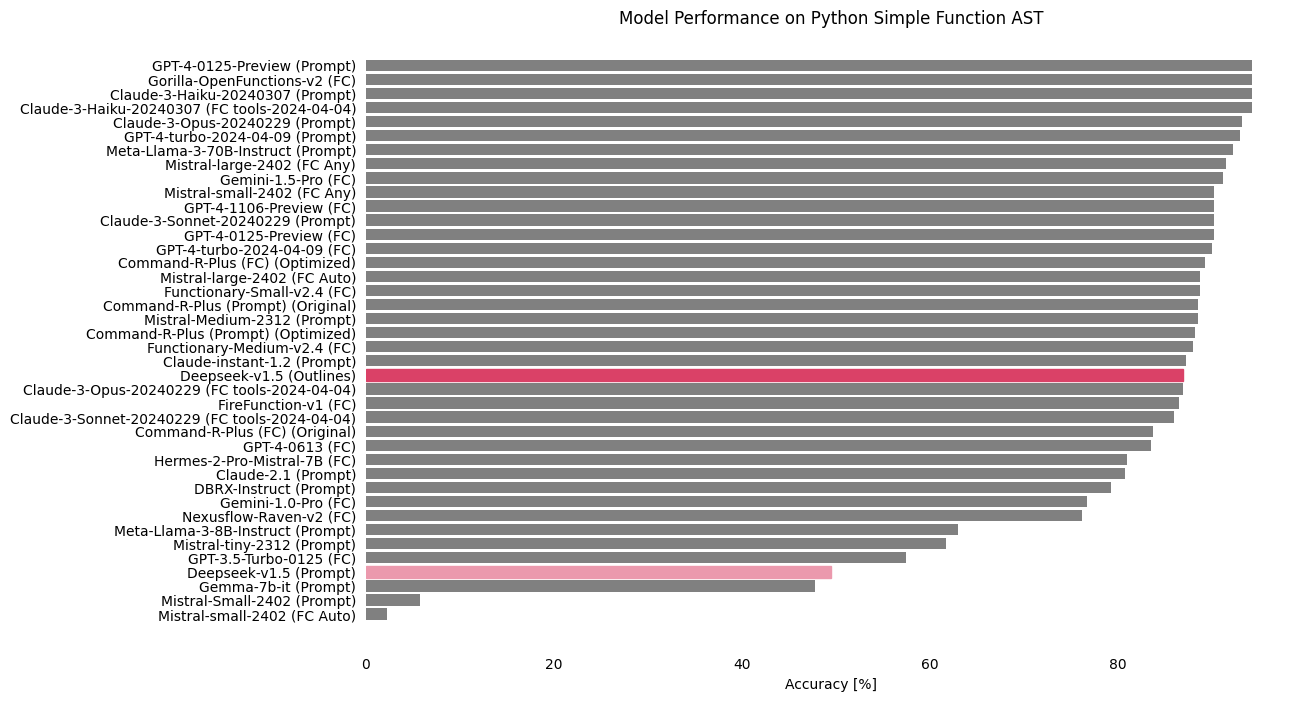

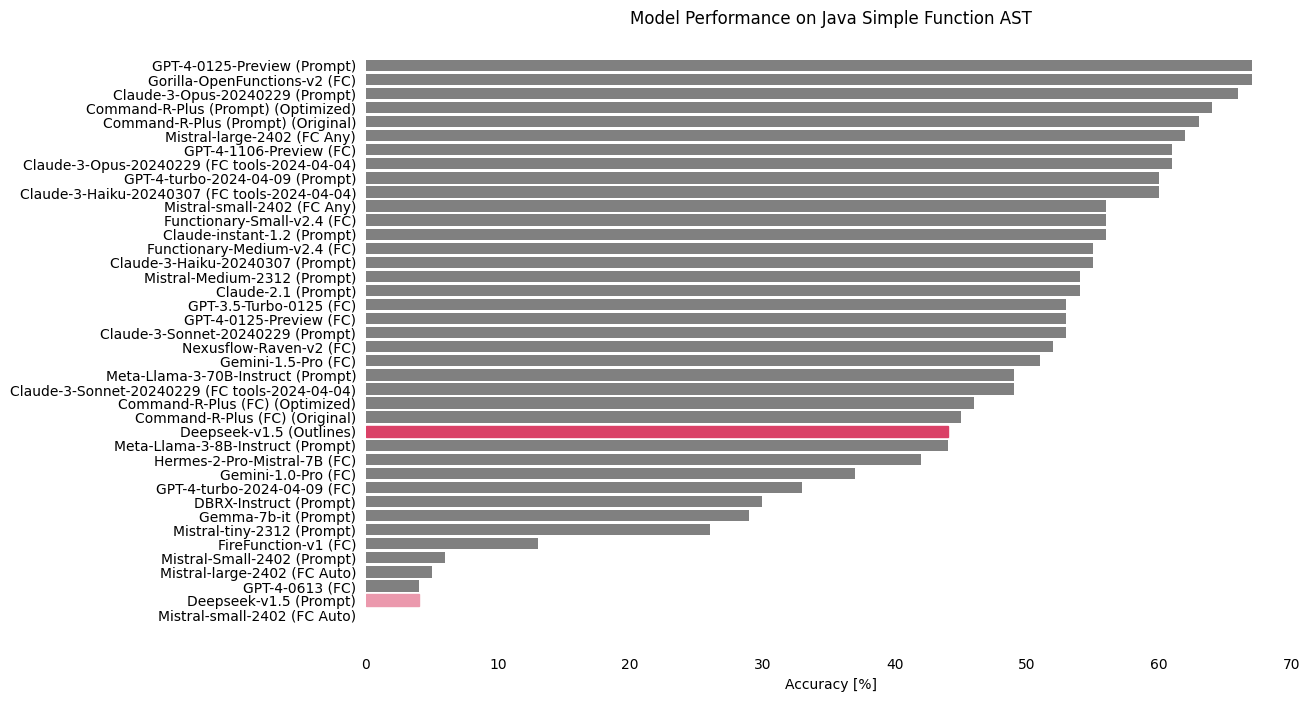

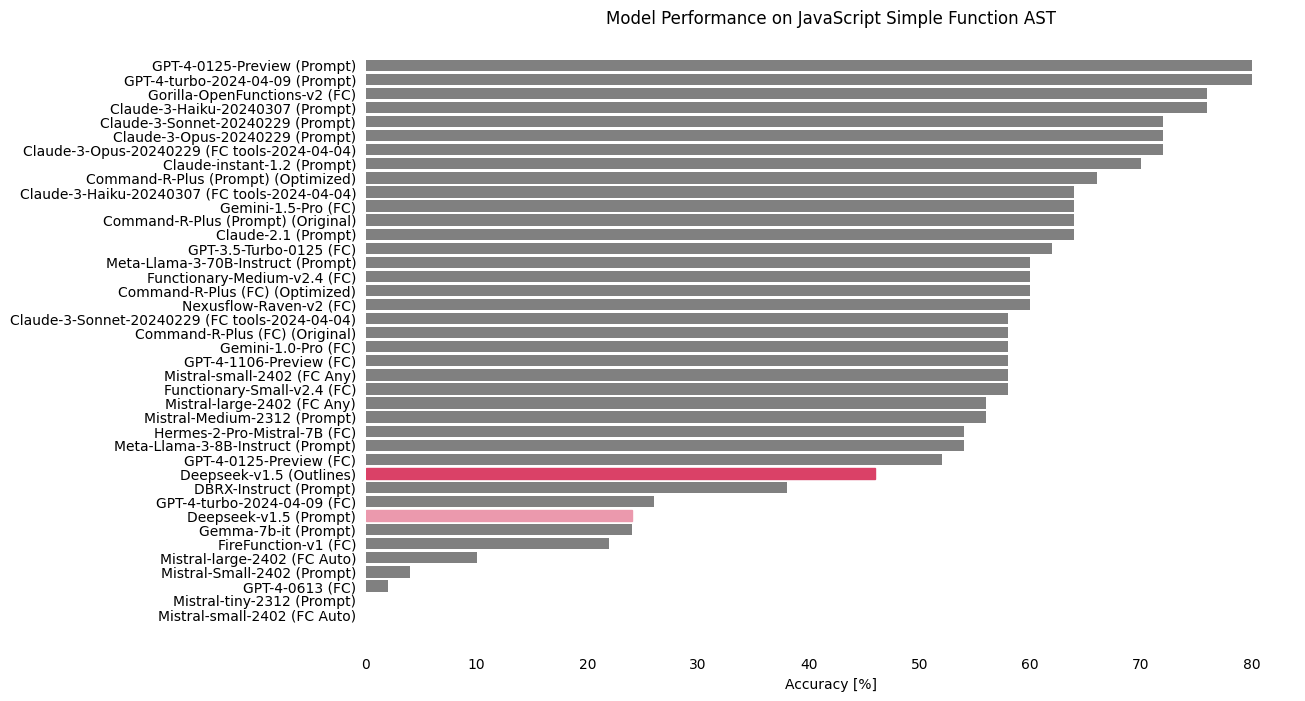

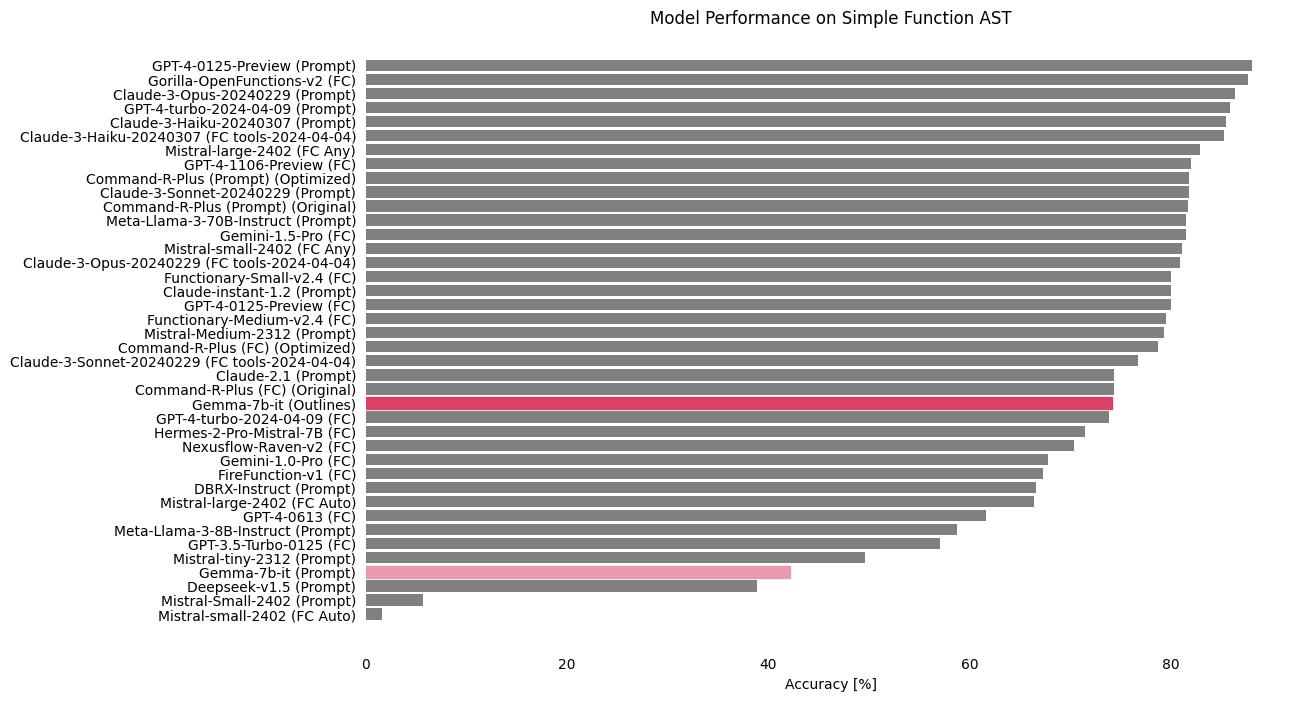

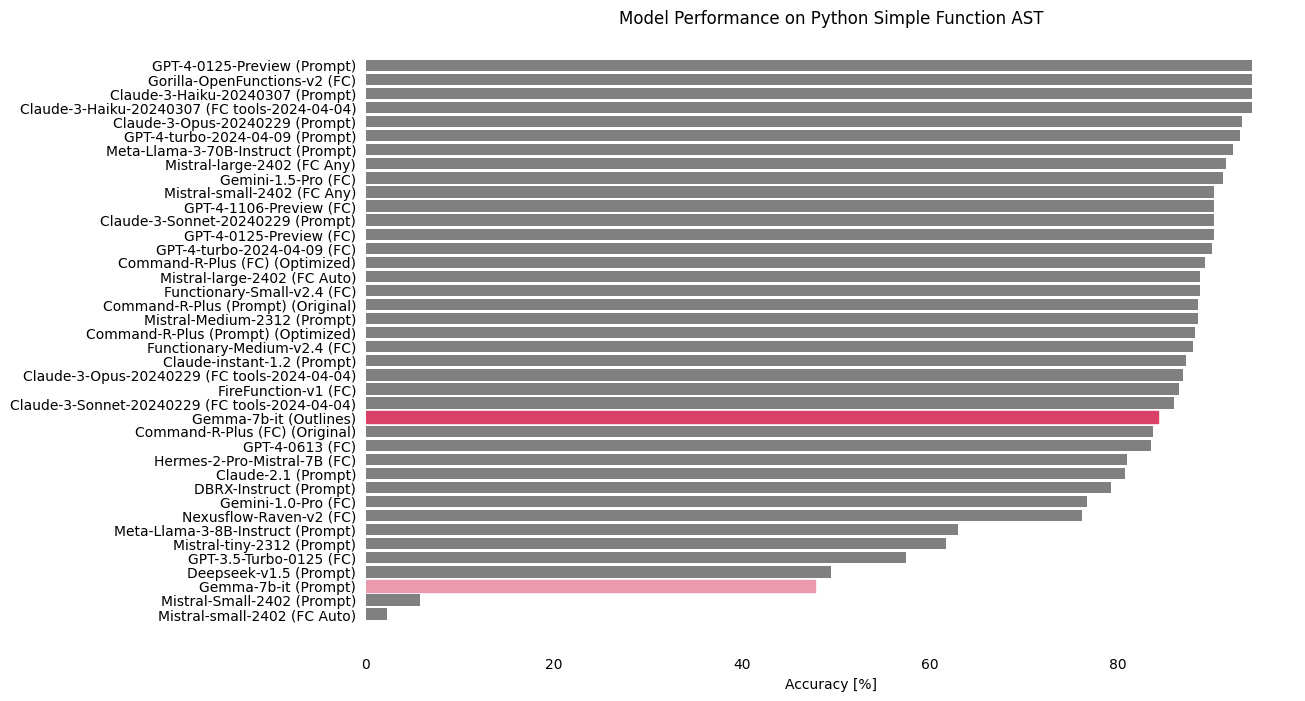

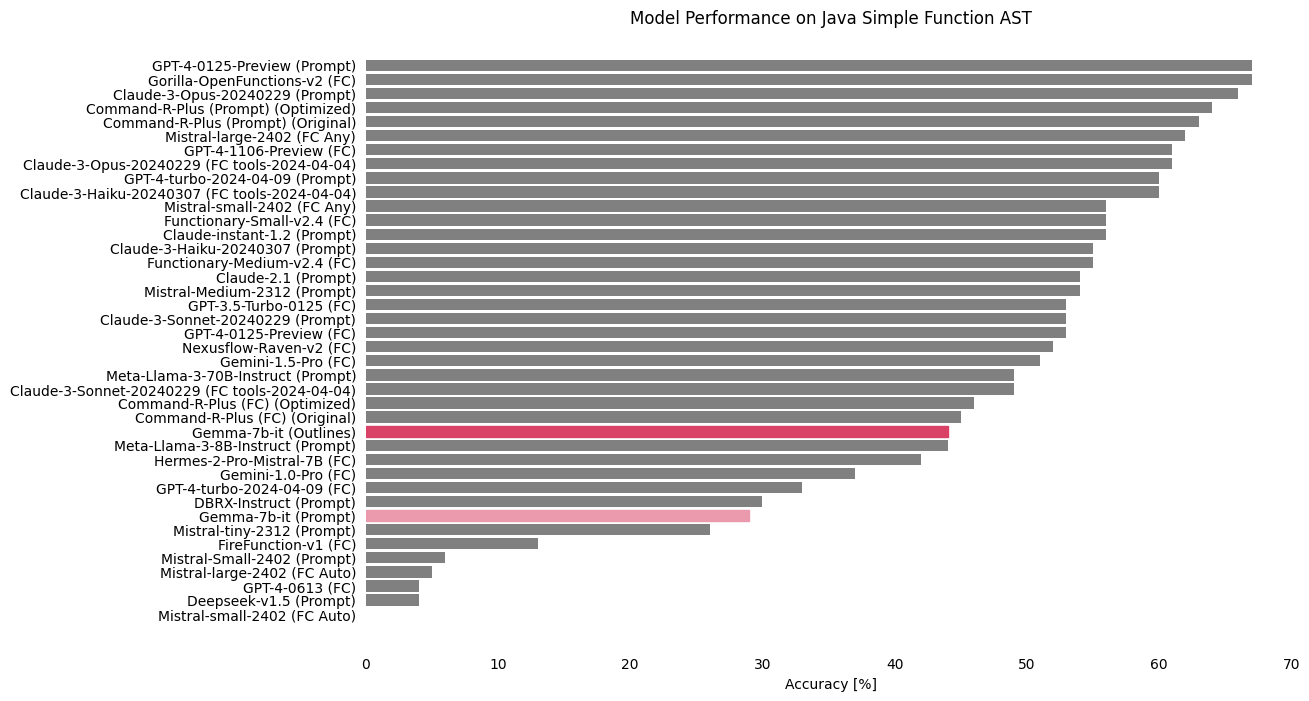

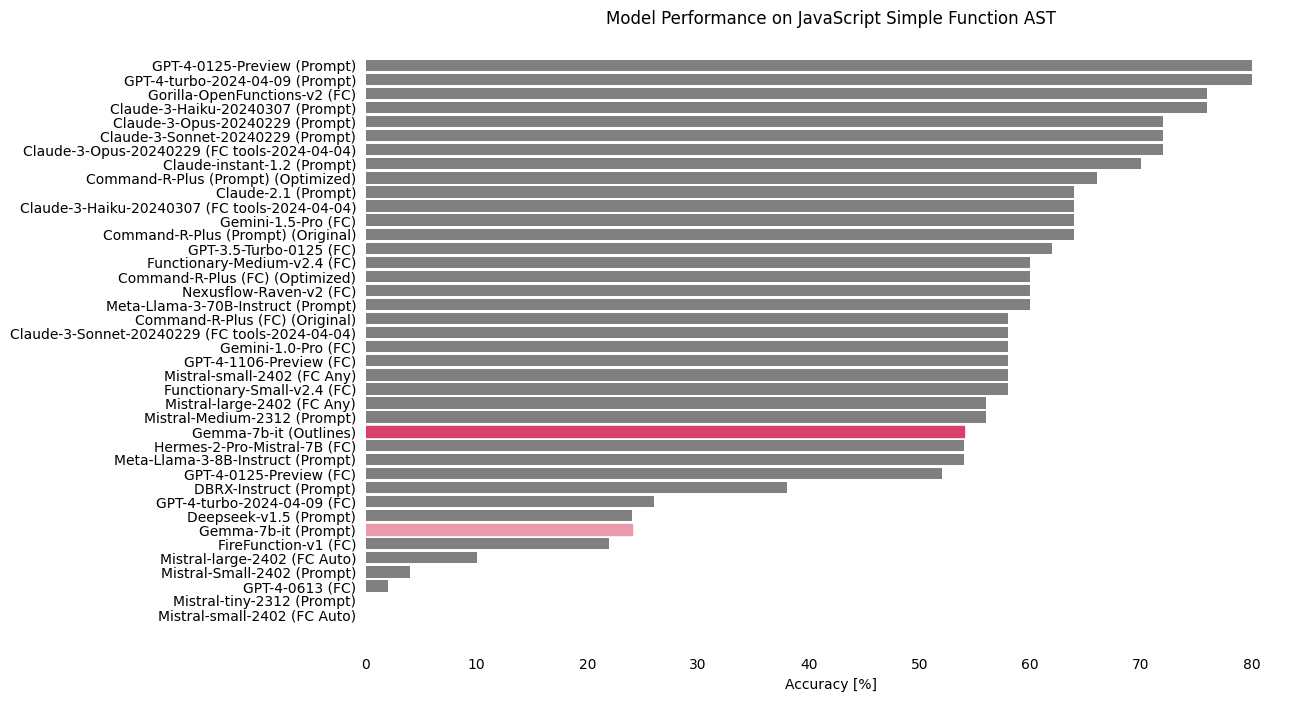

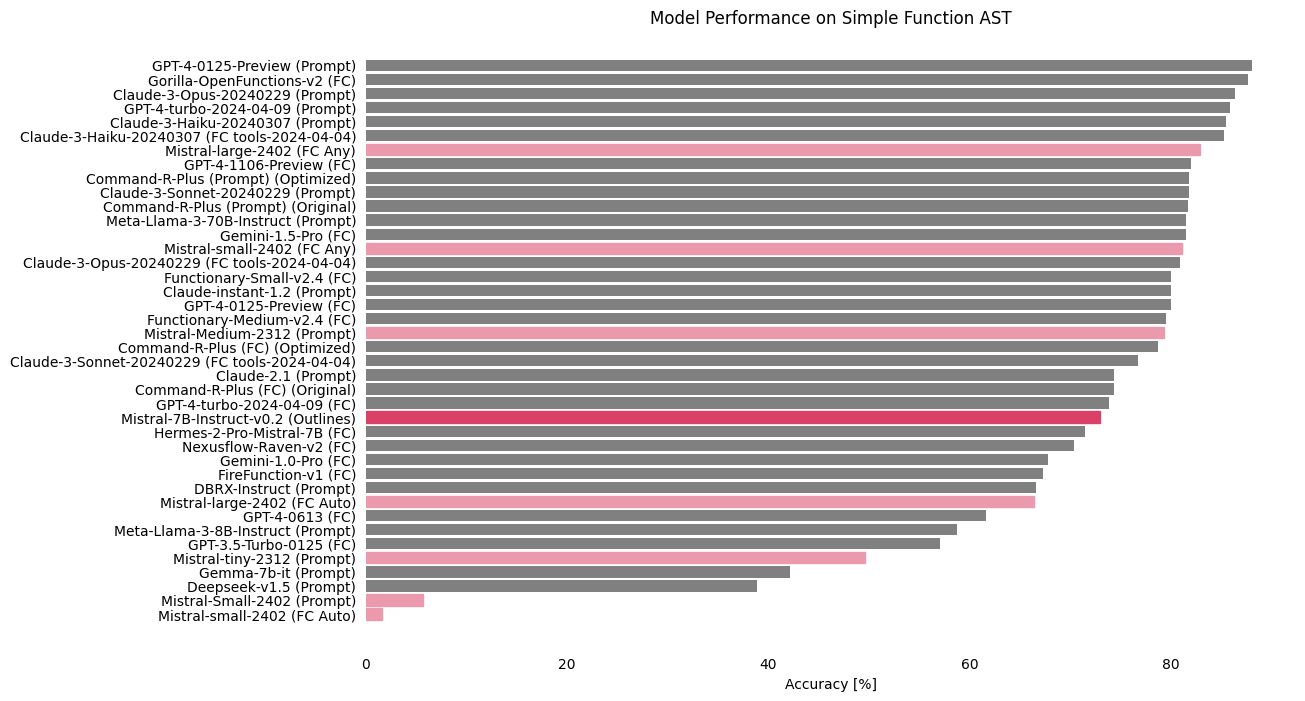

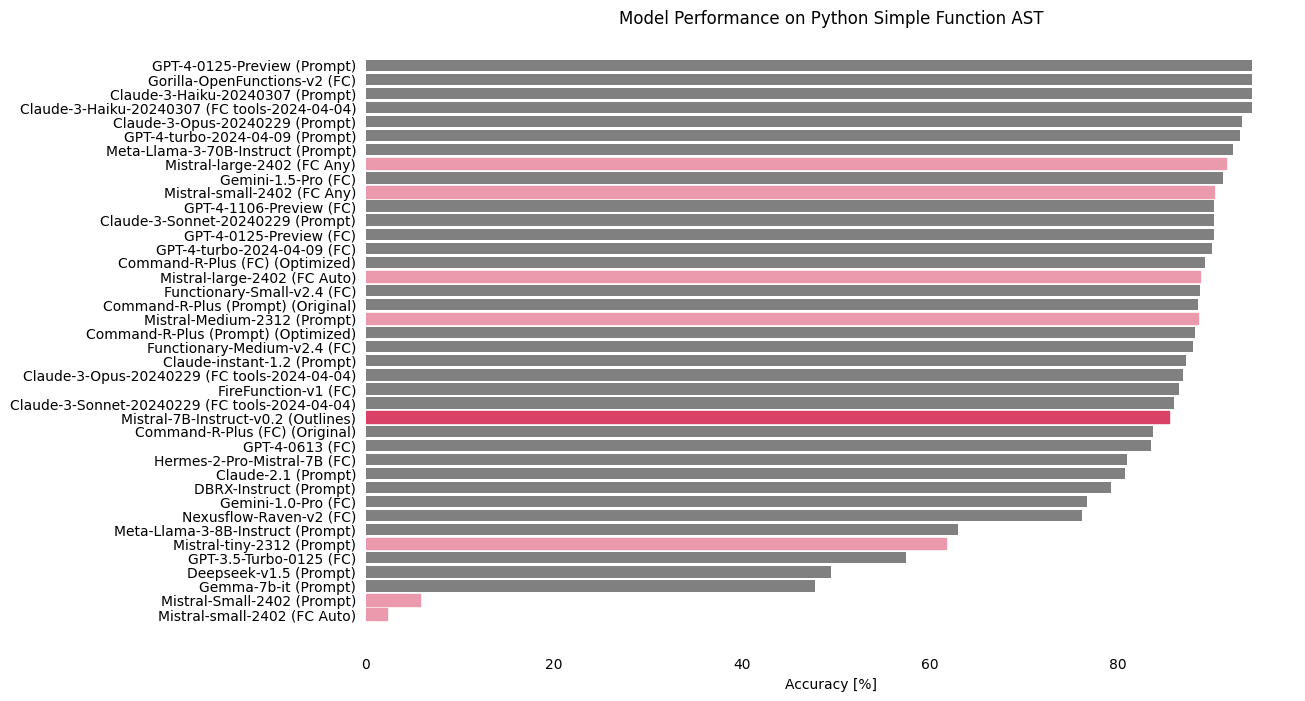

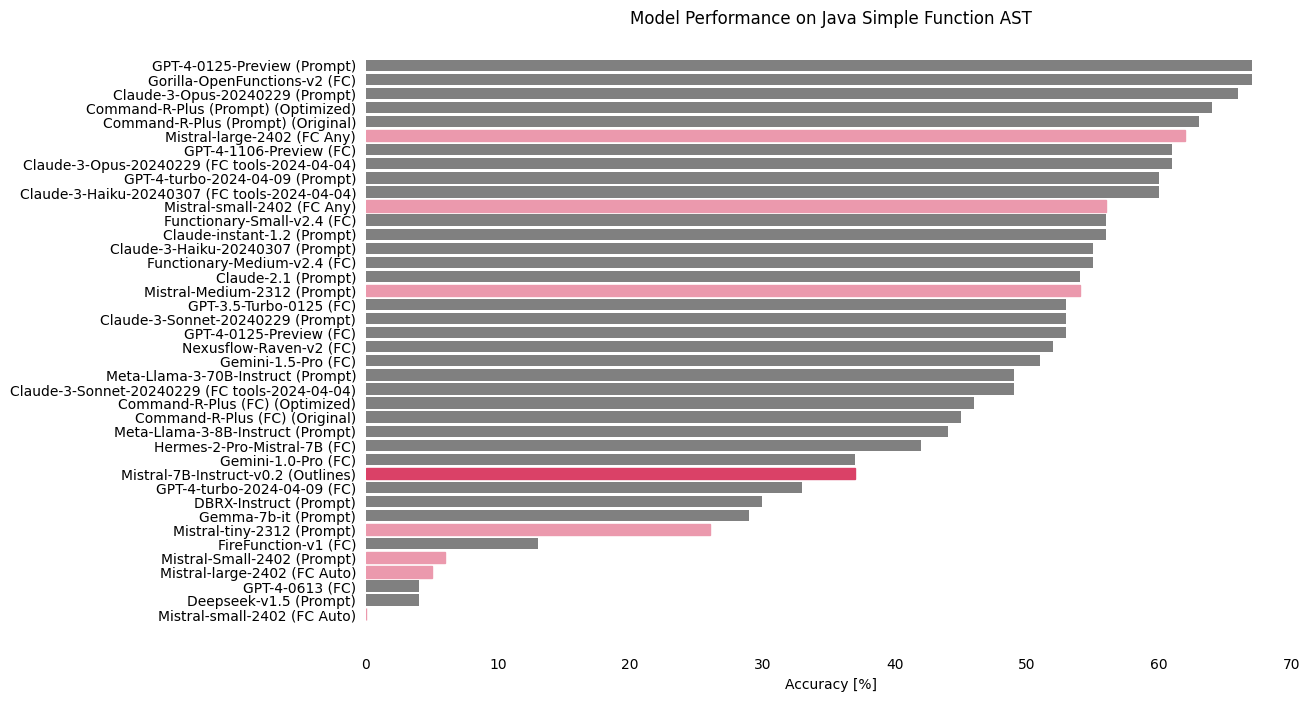

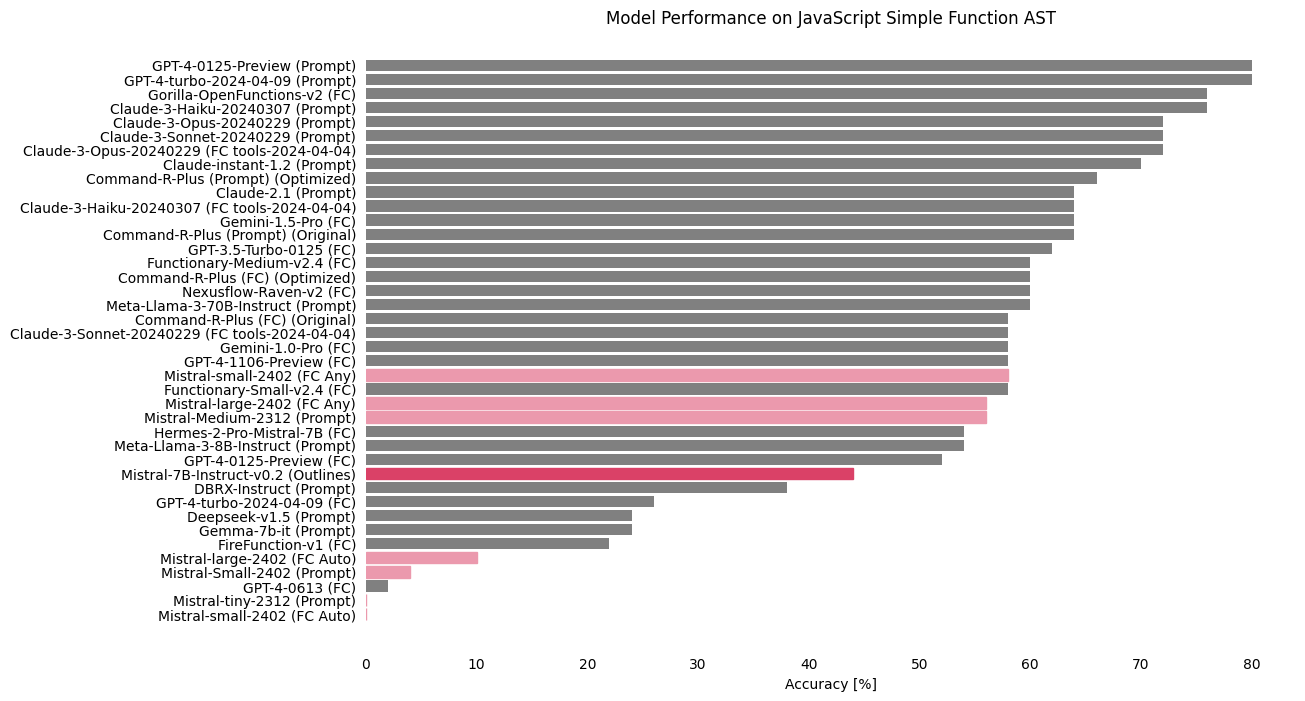

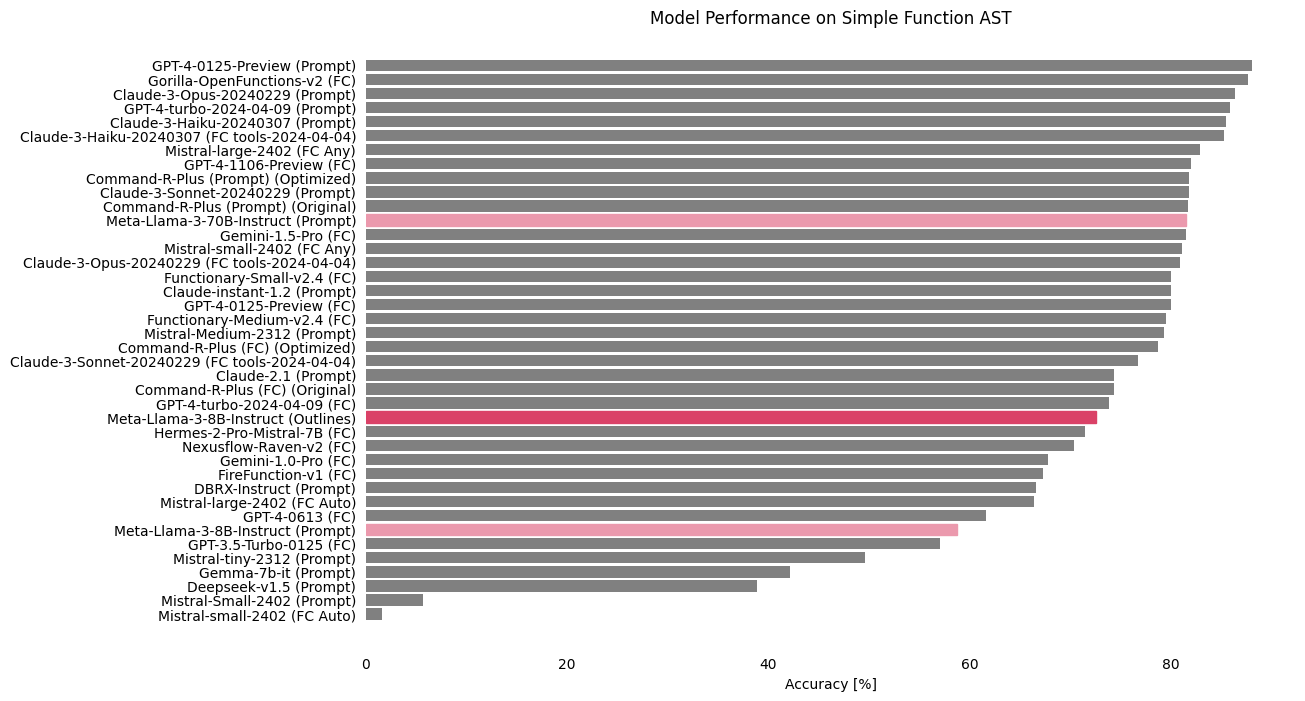

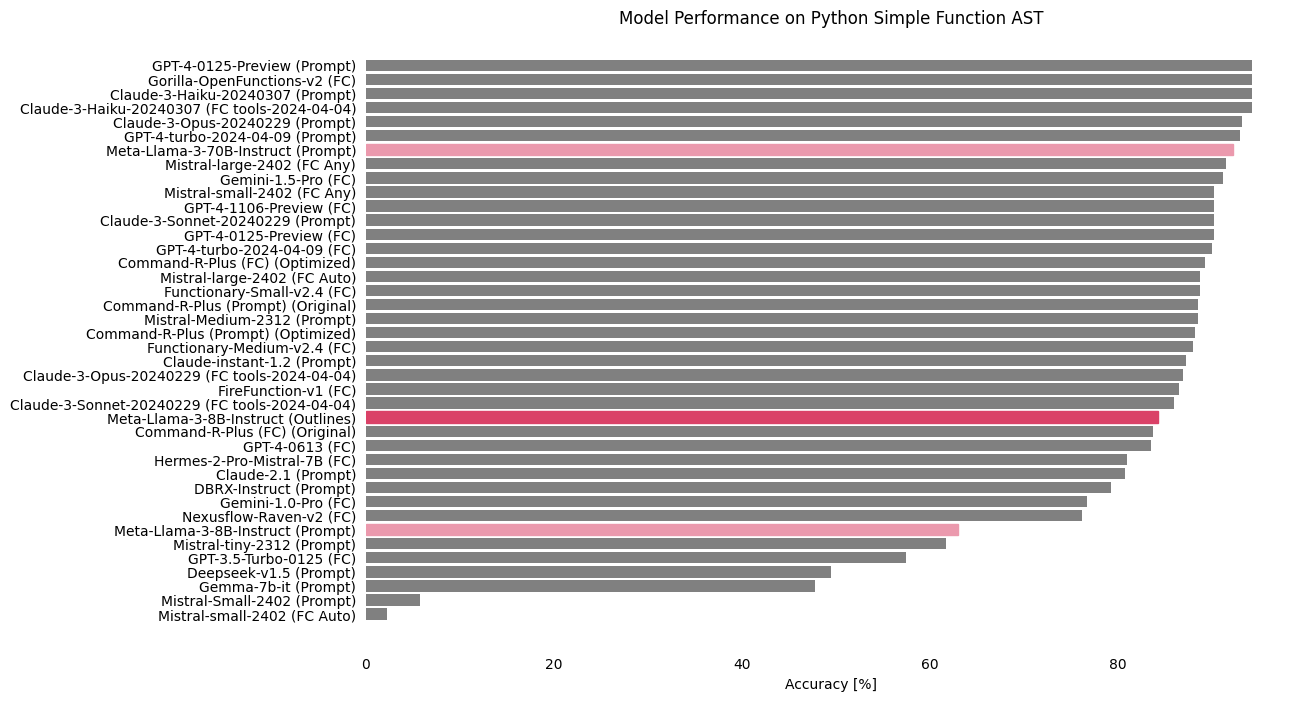

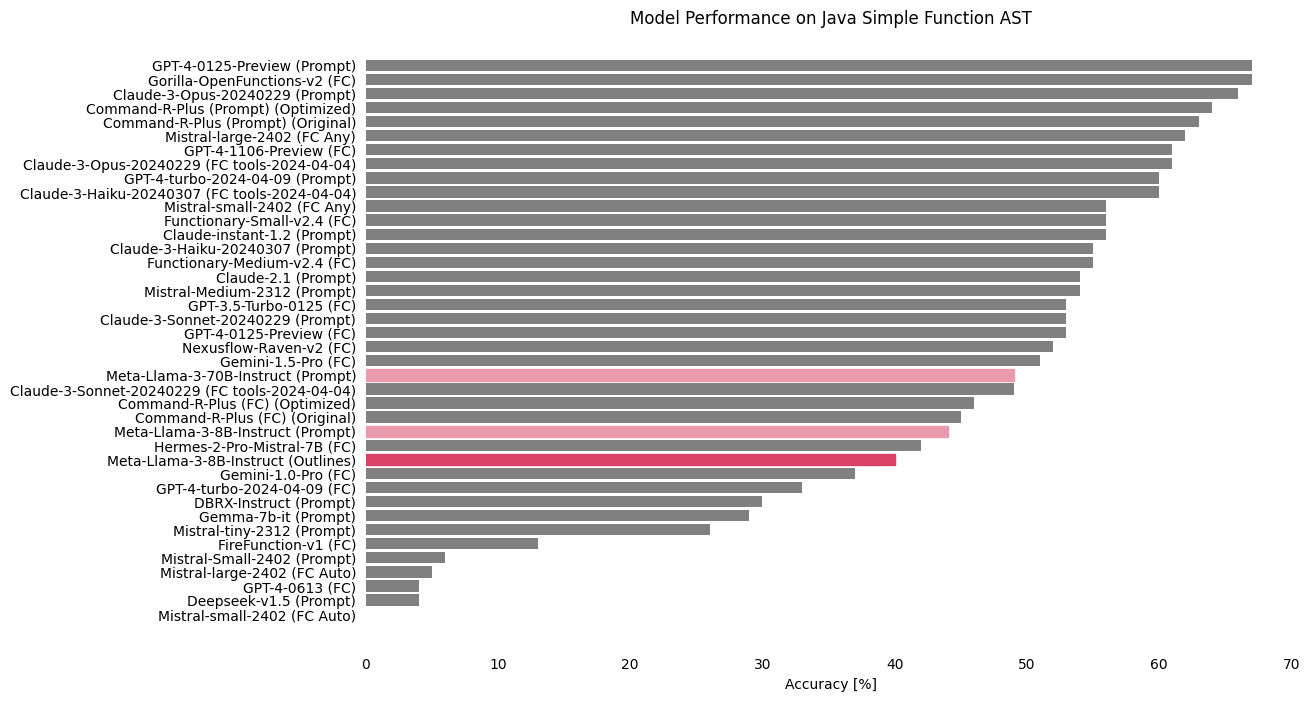

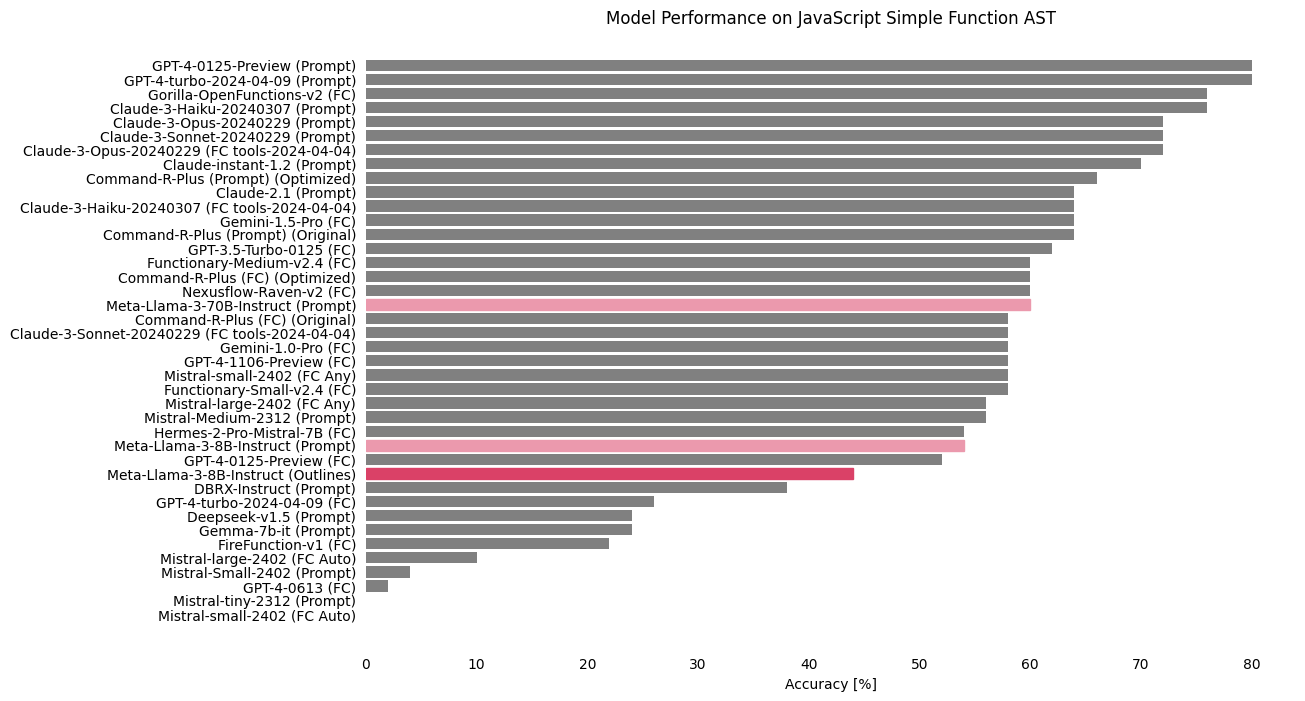

In [24]:
for model in df_outlines['Model']:
    df_table = insert_row(model, list(df_outlines[df_outlines['Model'] == model].values[0][1:]))
    plot_bar_ranking(df_table, metric='Simple Function AST')
    plot_bar_ranking(df_table, metric='Python Simple Function AST')
    plot_bar_ranking(df_table, metric='Java Simple Function AST')
    plot_bar_ranking(df_table, metric='JavaScript Simple Function AST')
